In [60]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from xgboost import plot_importance
from sklearn.utils import resample

In [3]:
columns = [
    "id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
    "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
    "fractal_dimension_worst"
]

df = pd.read_csv('wdbc.data', header=None, names=columns)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df[["concave_points_mean","radius_se","concave_points_worst"]]

,concave_points_mean,radius_se,concave_points_worst
0,0.14710,1.0950,0.2654
1,0.07017,0.5435,0.1860
2,0.12790,0.7456,0.2430
3,0.10520,0.4956,0.2575
4,0.10430,0.7572,0.1625
...,...,...,...
564,0.13890,1.1760,0.2216
565,0.09791,0.7655,0.1628
566,0.05302,0.4564,0.1418
567,0.15200,0.7260,0.2650


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave_points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>, <Axes: >,
        <Axes: >]], dtype=object)

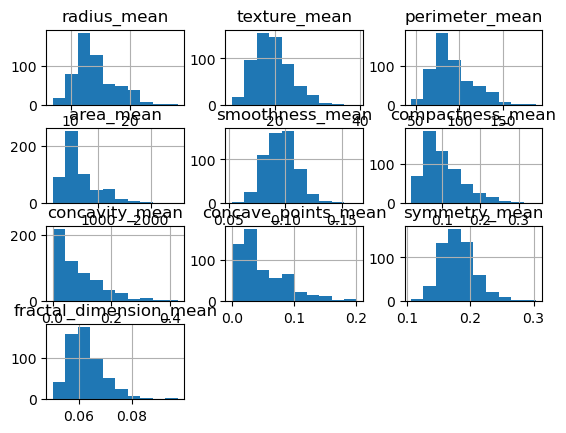

In [5]:
df[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
    "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean"]].hist()

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.drop(columns = ['id'],inplace=True)

In [9]:
df[df.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst


In [10]:
le = LabelEncoder()
df['Y'] = le.fit_transform(df['diagnosis'])

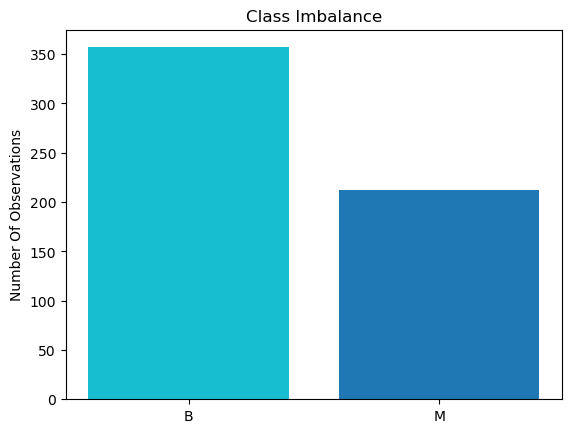

In [11]:
# Check for class Imbalance
size = df['diagnosis'].value_counts()
plt.bar(size.index,size,color = ['tab:cyan','tab:blue'])
plt.title('Class Imbalance')
plt.ylabel ('Number Of Observations')
plt.show()

In [12]:
size

diagnosis
B    357
M    212
Name: count, dtype: int64

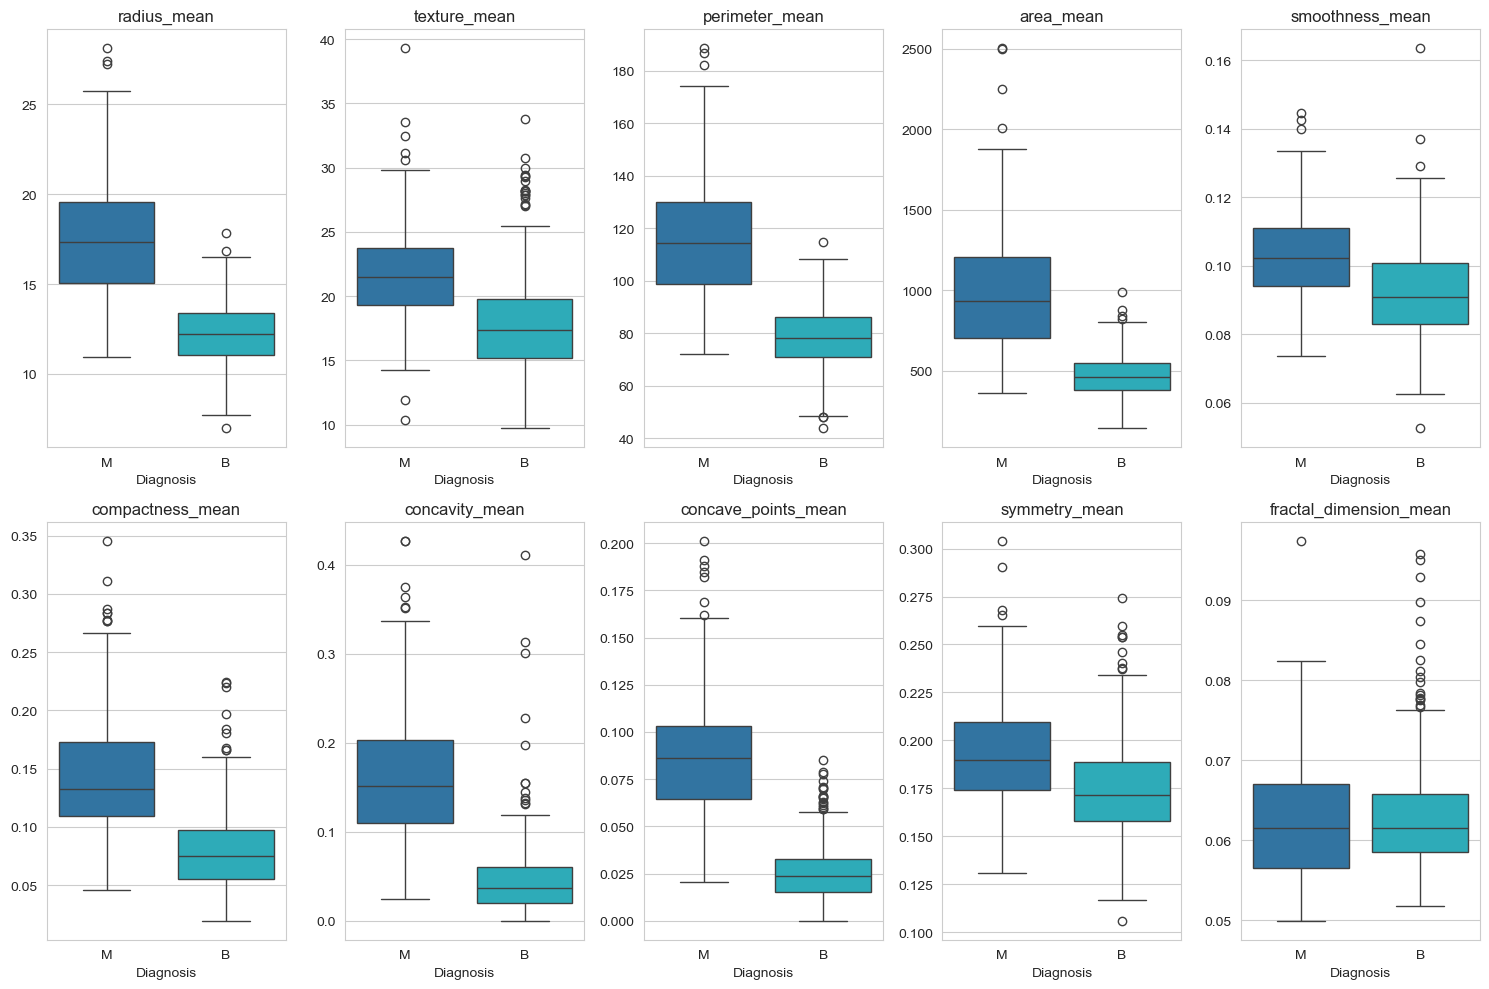

In [13]:
sns.set_style("whitegrid")
columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       ]
n_cols = 5
n_rows = (len(columns) ) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
palette = {'B': 'tab:cyan', 'M': 'tab:blue'}
for i, col in enumerate(columns):
    sns.boxplot(x=df['diagnosis'], y=df[col], ax=axes[i],hue=df['diagnosis'],palette = palette)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

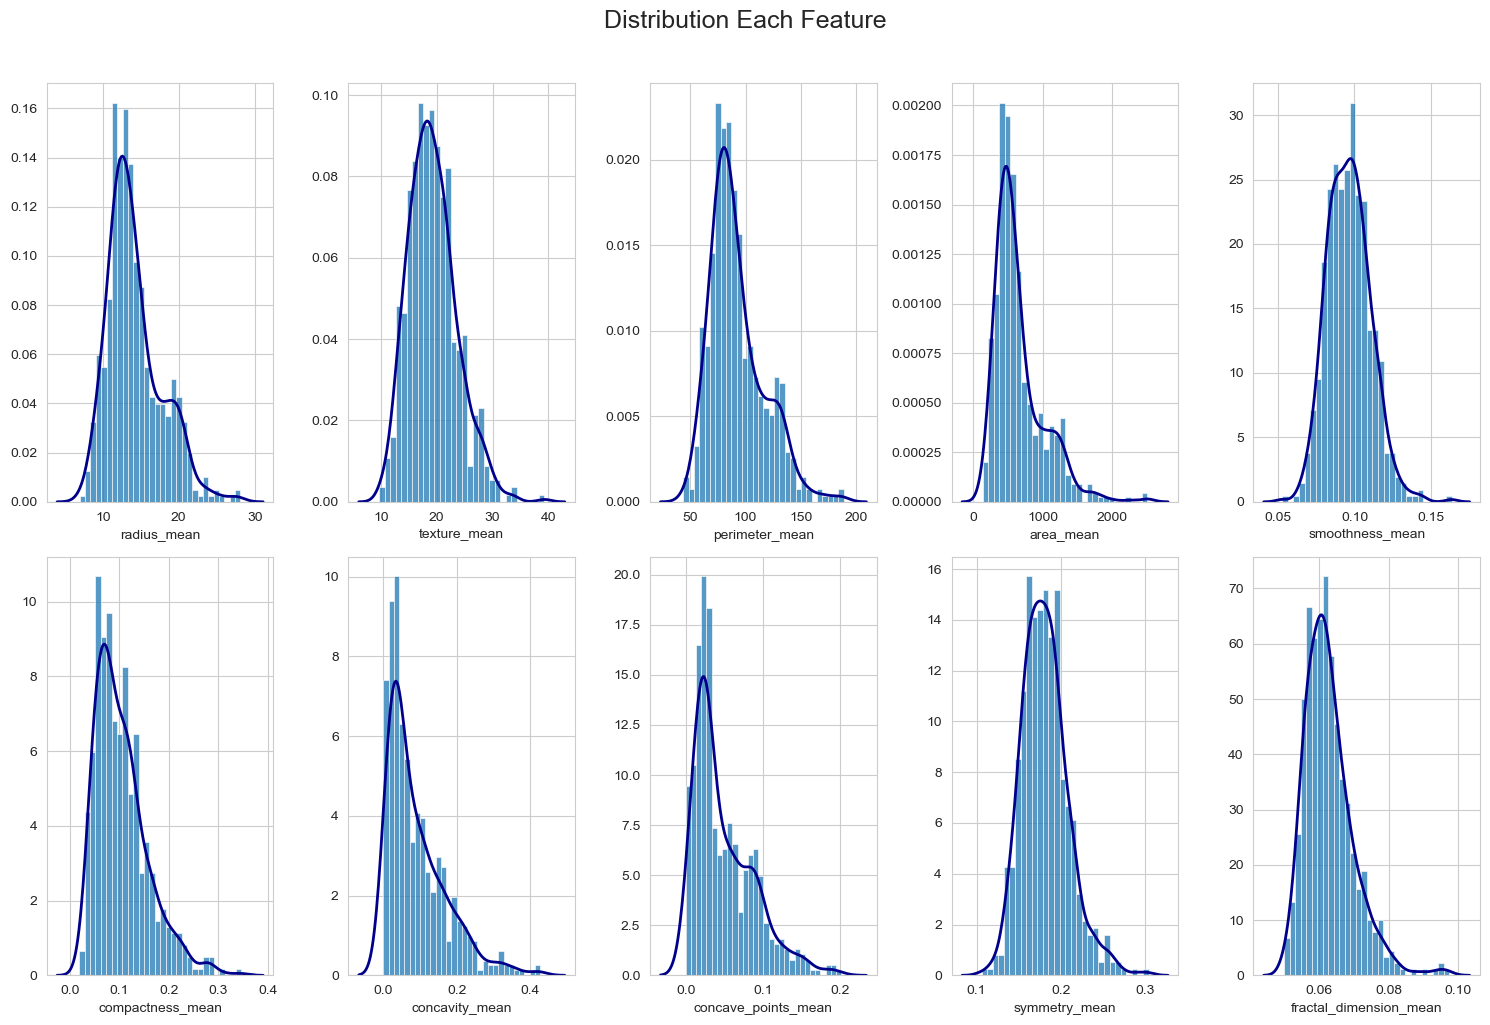

In [14]:
columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       ]
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(df[col], ax=axes[i], bins=30, stat='density')
    sns.kdeplot(df[col], ax=axes[i], color='darkblue', linewidth=2)
    axes[i].set_ylabel('')    
fig.suptitle('Distribution Each Feature', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()

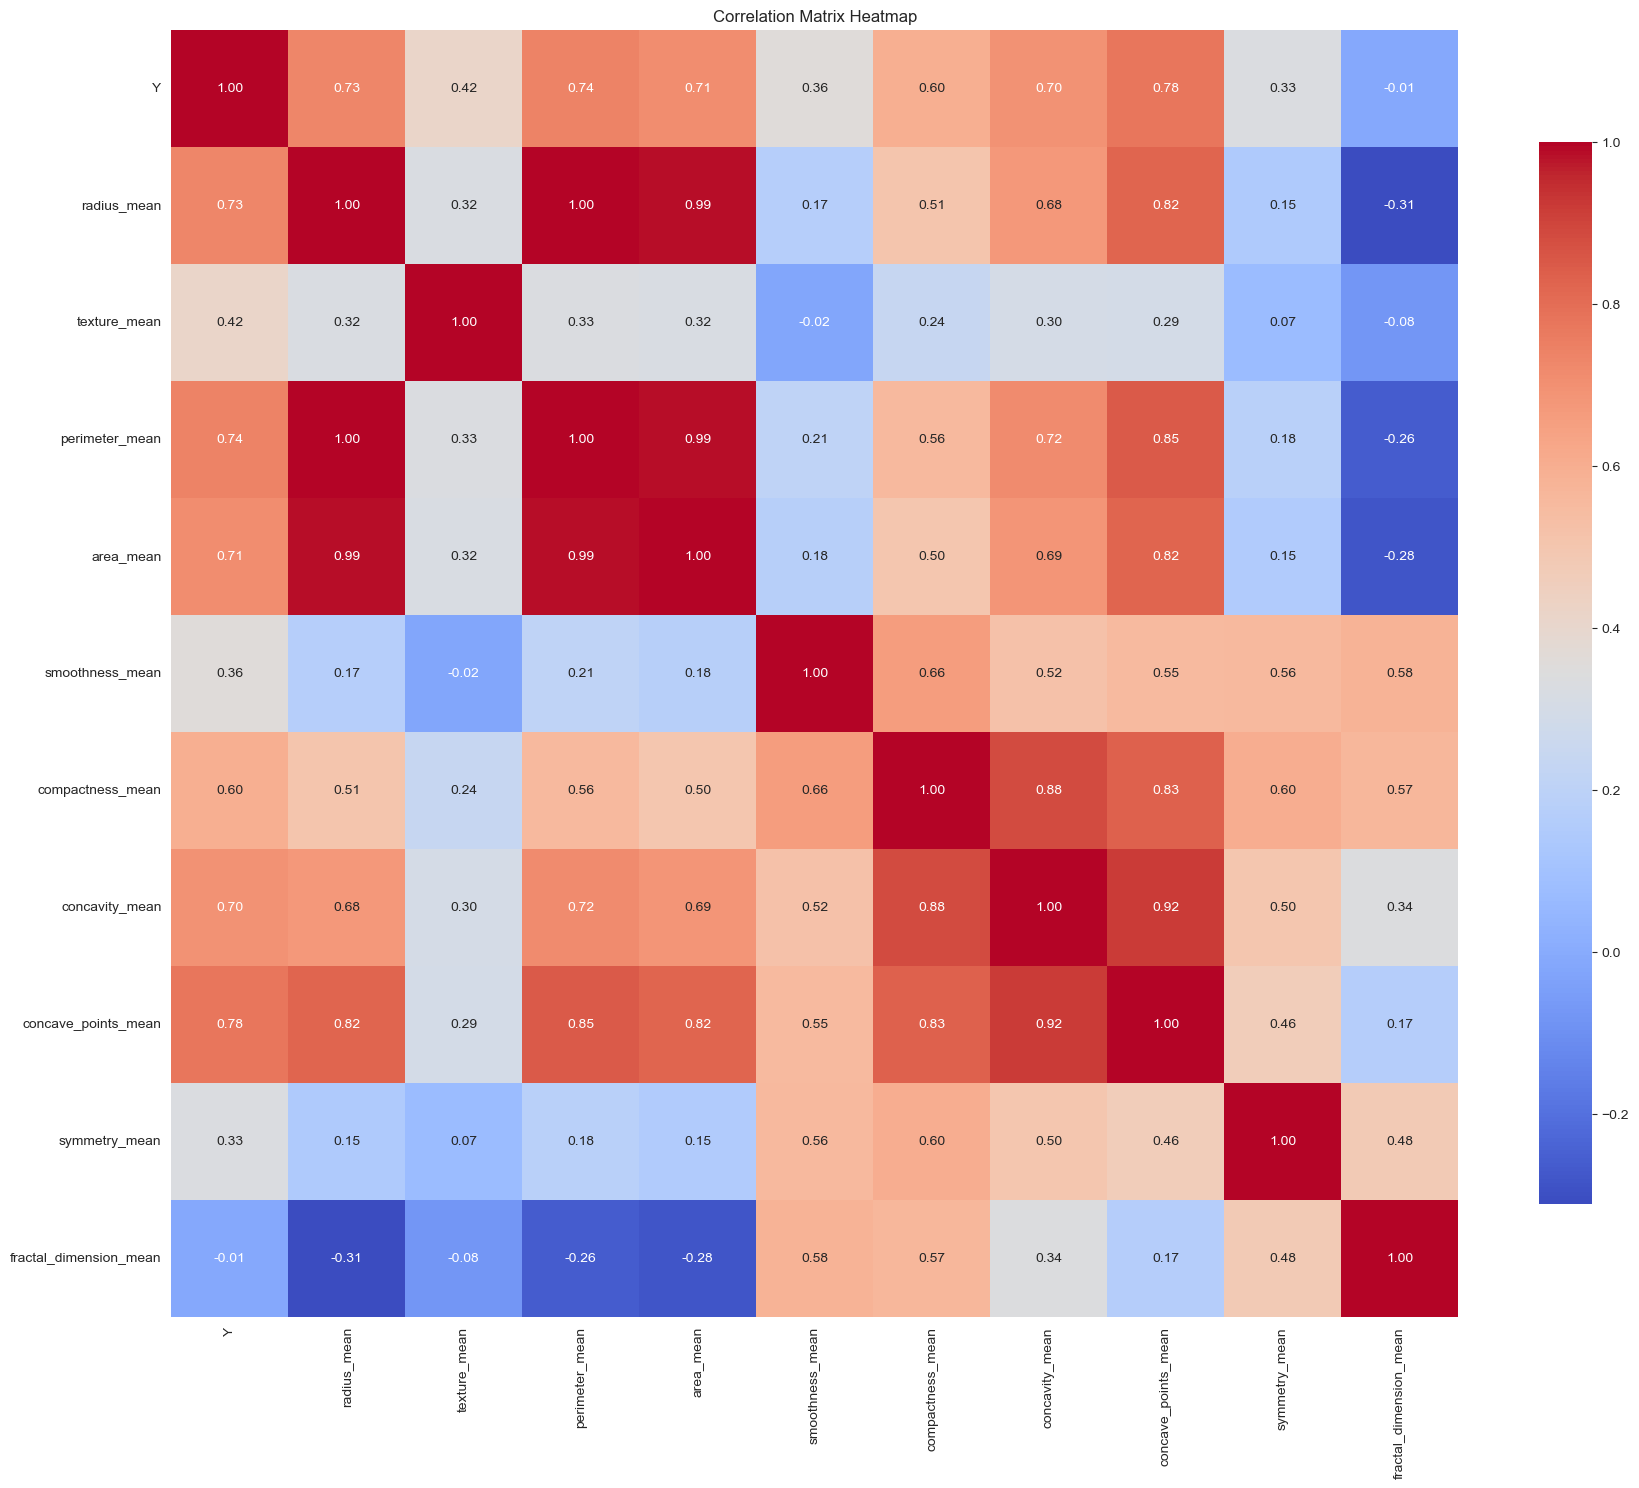

In [15]:
corr_matrix = df [['Y','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       ]].corr()

# Set the figure size and plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

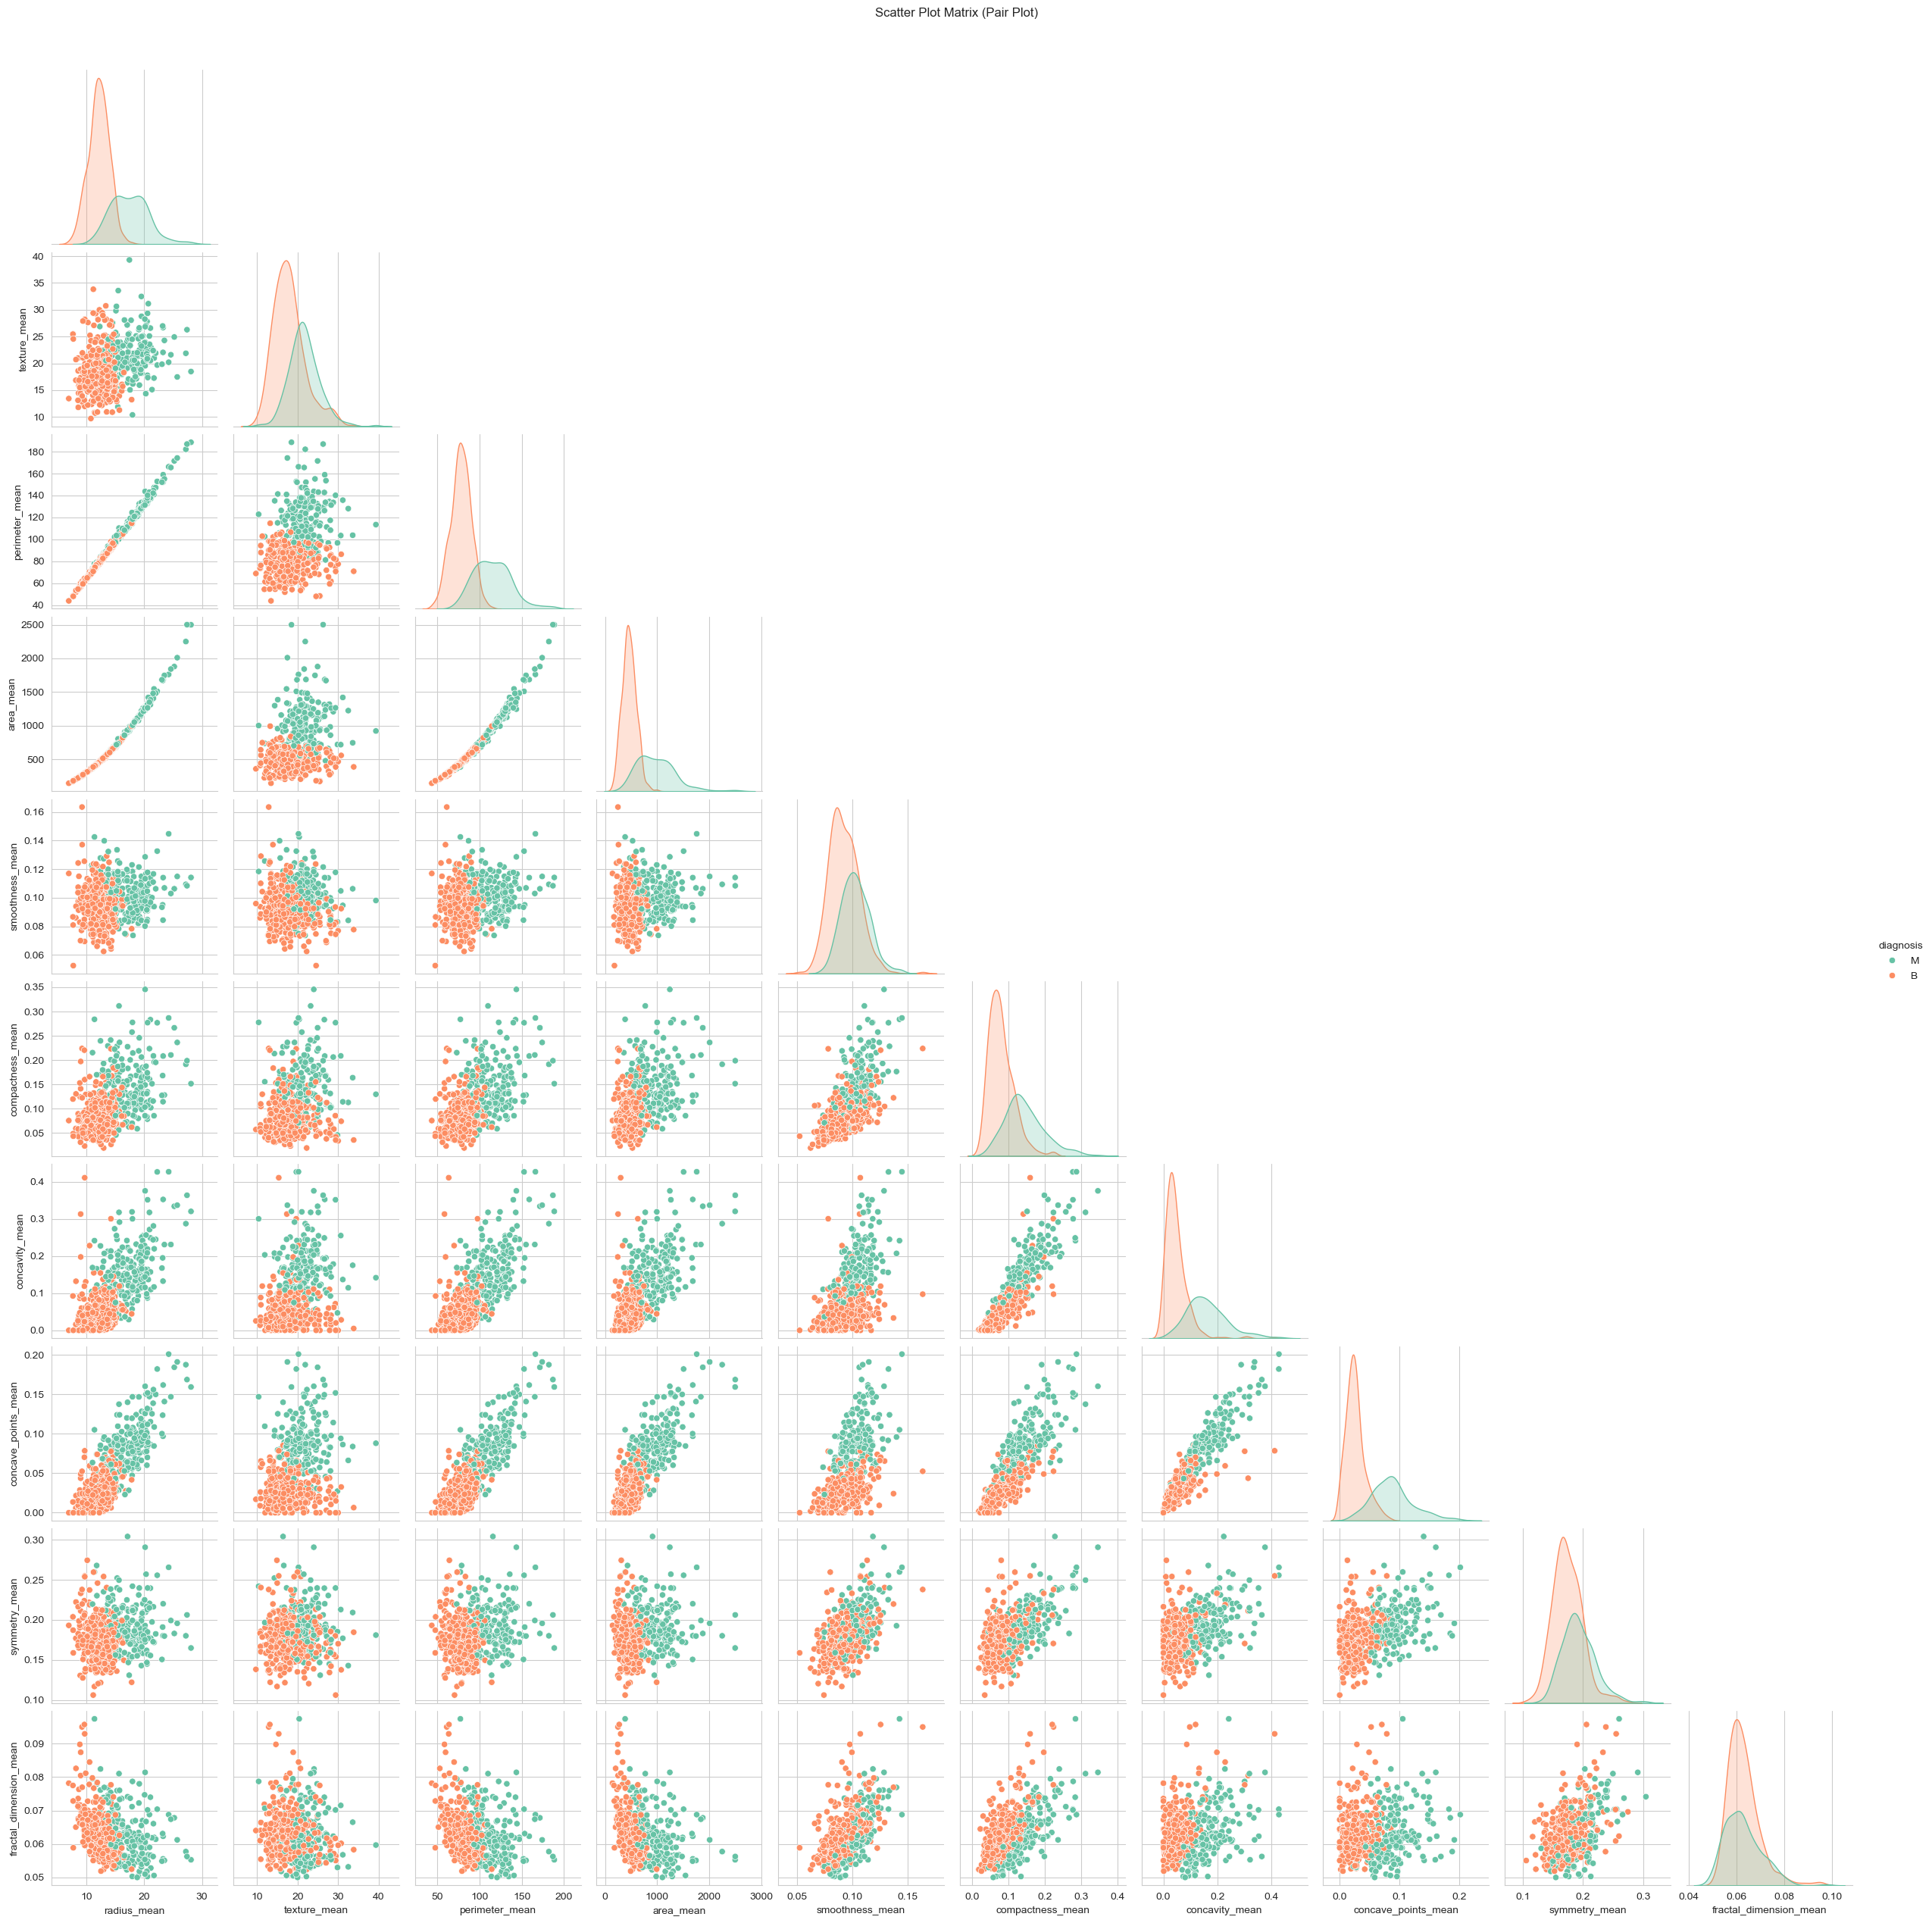

In [41]:
pairplot_df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                  'area_mean', 'smoothness_mean', 'compactness_mean',
                  'concavity_mean', 'concave_points_mean', 'symmetry_mean',
                  'fractal_dimension_mean']]

sns.pairplot(pairplot_df, hue='diagnosis', palette='Set2', corner=True)

plt.suptitle('Scatter Plot Matrix (Pair Plot)', y=1.02)
plt.show()

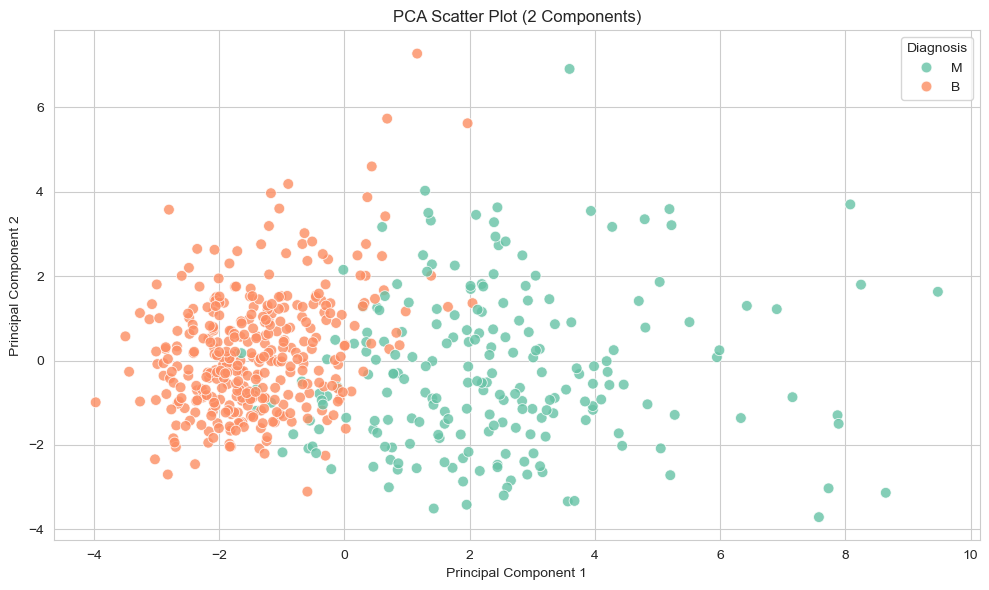

In [18]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

X = StandardScaler().fit_transform(df[features])

pca = PCA(n_components=2)
components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Y'] = df['diagnosis']

# Step 5: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Y', palette='Set2', s=60, alpha=0.8)
plt.title('PCA Scatter Plot (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.tight_layout()
plt.show()

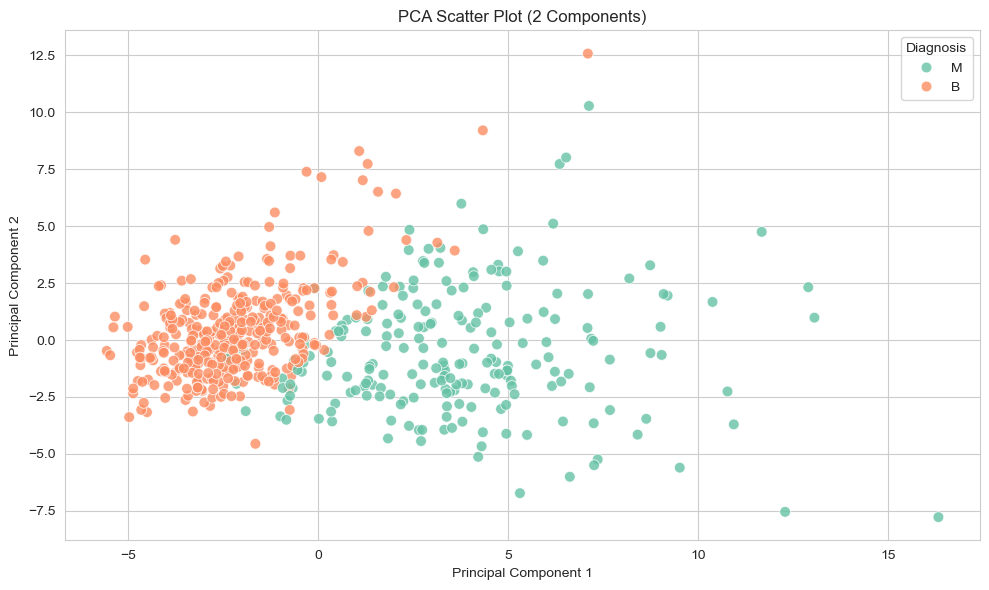

In [44]:
features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
    "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
    "fractal_dimension_worst"
]

X = StandardScaler().fit_transform(df[features])

pca = PCA(n_components=2)
components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Y'] = df['diagnosis']

# Step 5: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Y', palette='Set2', s=60, alpha=0.8)
plt.title('PCA Scatter Plot (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.tight_layout()
plt.show()

## Basic XGBoost with first 10 features

Accuracy: 0.9474


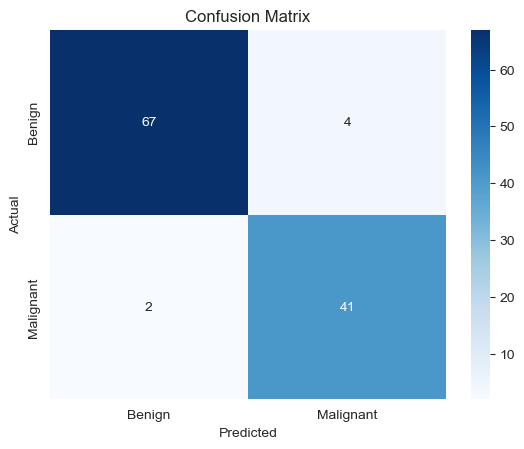

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [46]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

X = df[features]  
y = df['Y']     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss') 

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

## Lets use all the features 

Accuracy: 0.9561


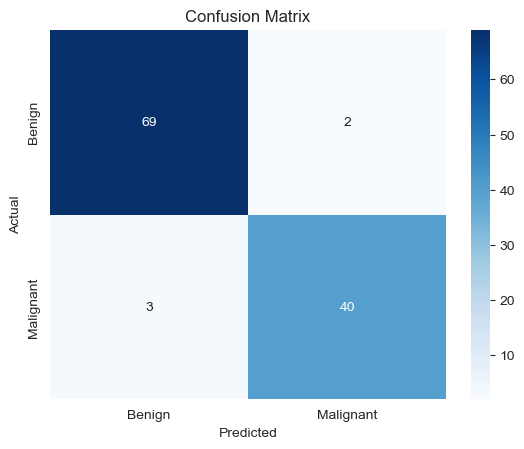

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [48]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
    "fractal_dimension_worst"]

X = df[features] 
y = df['Y']     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')  # Suppress warnings

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

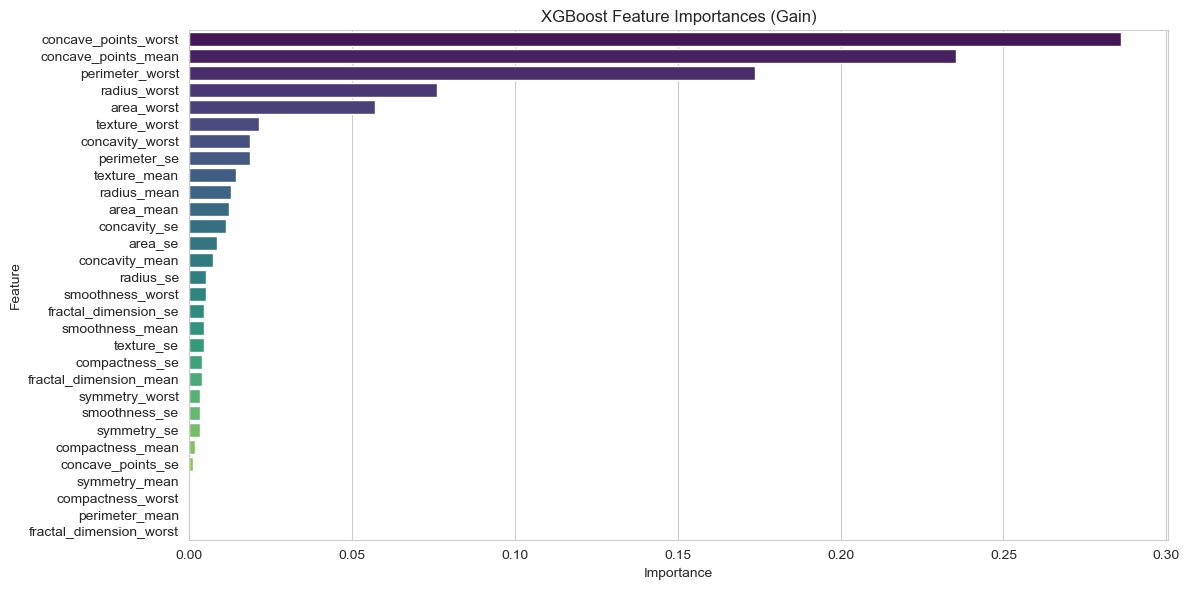

In [49]:
importances = xgb_model.feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis', hue='Feature' )
plt.title('XGBoost Feature Importances (Gain)')
plt.tight_layout()
plt.show()

Accuracy: 0.9123


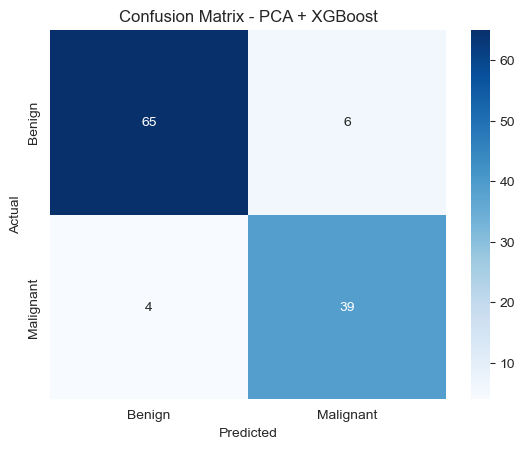

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        71
           1       0.87      0.91      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [55]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

X = df[features] 
y = df['Y']    

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')  # Suppress warnings
xgb_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - PCA + XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

## Using 'scale_pos_weight' for XGBoost

Accuracy: 0.9123


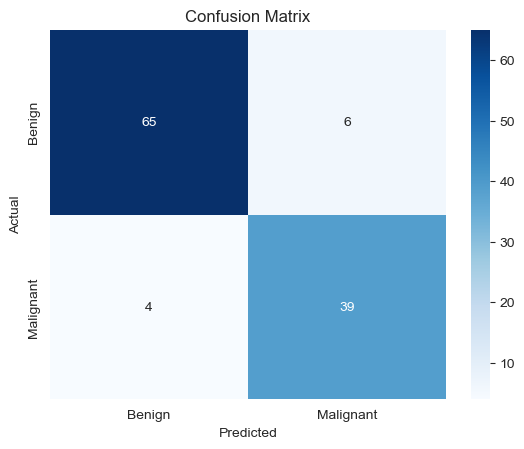

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        71
           1       0.87      0.91      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [61]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

X = df[features] 
y = df['Y']    

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(scale_pos_weight=357 / 212)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9123


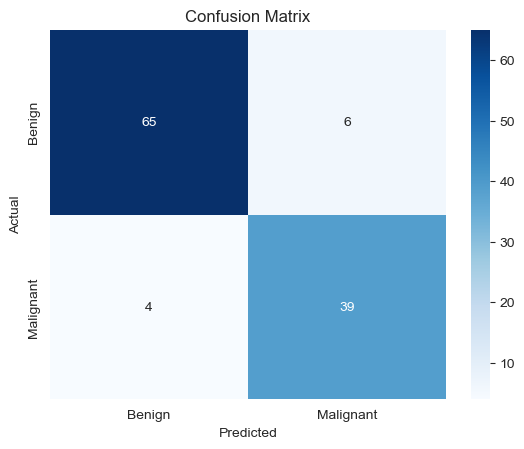

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        71
           1       0.87      0.91      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [59]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
    "fractal_dimension_worst"]

X = df[features] 
y = df['Y']    

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(scale_pos_weight=357 / 212)
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

## Lets make the data balanced

In [23]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Y
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [62]:
df_majority = df[df.diagnosis == 'B']
df_minority = df[df.diagnosis == 'M']

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=42) 

df_upsampled = pd.concat([df_majority, df_minority_upsampled])


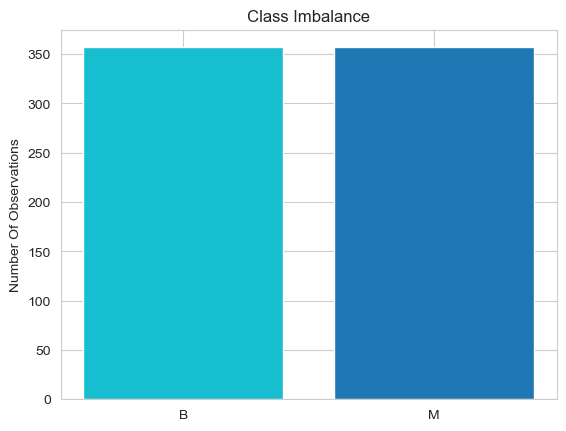

In [63]:
size = df_upsampled['diagnosis'].value_counts()
plt.bar(size.index,size,color = ['tab:cyan','tab:blue'])
plt.title('Class Imbalance')
plt.ylabel ('Number Of Observations')
plt.show()

Accuracy: 0.9650


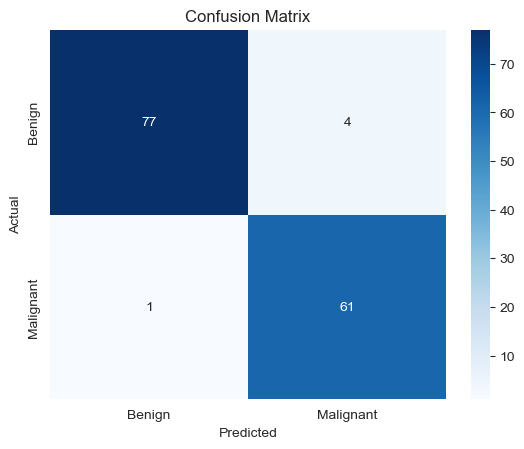

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        81
           1       0.94      0.98      0.96        62

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [66]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

X = df_upsampled[features]
y = df_upsampled['Y']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')  

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

## Change some features based on importance report

Accuracy: 0.9649


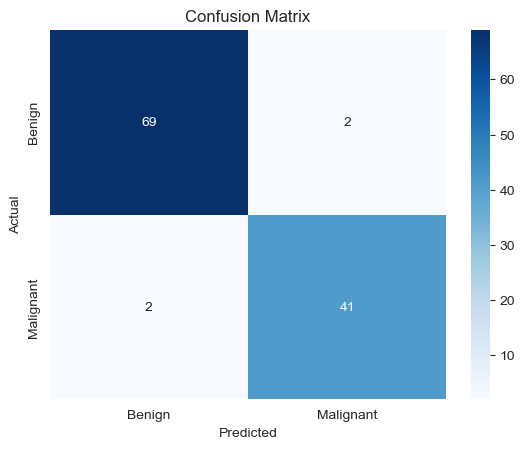

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [67]:
features = ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
    "fractal_dimension_worst"]

X = df[features]  
y = df['Y']      


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')  

xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

## Now do the same thing with the balanced data 

Accuracy: 0.9720


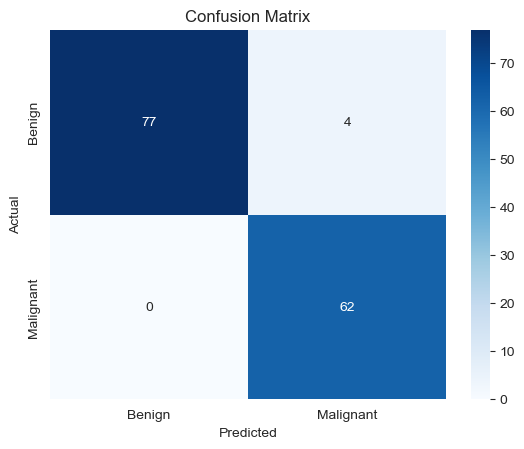

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        81
           1       0.94      1.00      0.97        62

    accuracy                           0.97       143
   macro avg       0.97      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143



In [68]:
features = ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
    "fractal_dimension_worst"]

X = df_upsampled[features]
y = df_upsampled['Y']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')  

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

## Now lets use Cross-Fold-Validation with 10 Folds

In [78]:
features = ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
    "fractal_dimension_worst"]

X = df_upsampled[features]  
y = df_upsampled['Y'] 

kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = xgb.XGBClassifier(eval_metric='logloss')
metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    metrics['accuracy'].append(accuracy_score(y_val, y_pred))
    metrics['precision'].append(precision_score(y_val, y_pred))
    metrics['recall'].append(recall_score(y_val, y_pred))
    metrics['f1'].append(f1_score(y_val, y_pred))

for metric, values in metrics.items():
    values = np.array(values)
    print(f"{metric.title()} per fold: {np.round(values, 4)}")
    print(f"Mean {metric.title()}: {values.mean():.4f} | Std: {values.std():.4f}\n")

Accuracy per fold: [0.9583 0.9722 0.9722 0.9722 0.9859 1.     1.     0.9437 1.     1.    ]
Mean Accuracy: 0.9805 | Std: 0.0190

Precision per fold: [0.9412 0.9355 0.9722 0.931  0.973  1.     1.     0.9111 1.     1.    ]
Mean Precision: 0.9664 | Std: 0.0324

Recall per fold: [0.9697 1.     0.9722 1.     1.     1.     1.     1.     1.     1.    ]
Mean Recall: 0.9942 | Std: 0.0116

F1 per fold: [0.9552 0.9667 0.9722 0.9643 0.9863 1.     1.     0.9535 1.     1.    ]
Mean F1: 0.9798 | Std: 0.0186



In [76]:
print (f' Average accuracy of ten folds : {np.mean(metrics["accuracy"])}')
print (f' Average precision of ten folds : {np.mean(metrics['precision'])}')
print (f' Average recall of ten folds : {np.mean(metrics['recall'])}')
print (f' Average f1score of ten folds : {np.mean(metrics['f1'])}')

 Average accuracy of ten folds : 0.9804577464788732
 Average precision of ten folds : 0.9664001130620903
 Average recall of ten folds : 0.9941919191919192
 Average f1score of ten folds : 0.9798188225727655


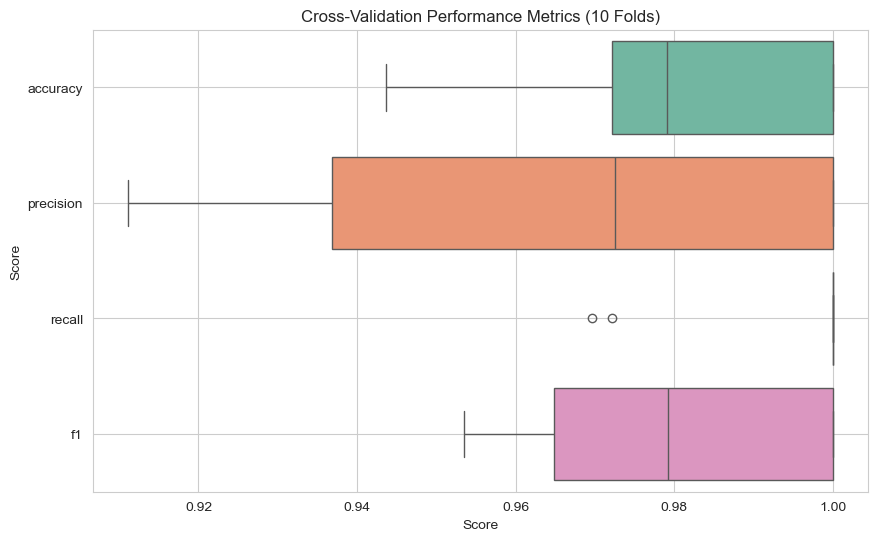

In [79]:
metrics_df = pd.DataFrame(metrics)

metrics_melted = metrics_df.melt(var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.boxplot(data=metrics_melted, x='Score', y='Metric', palette='Set2',hue='Metric')
plt.title('Cross-Validation Performance Metrics (10 Folds)')
plt.ylabel('Score')
plt.grid(True)
plt.show()

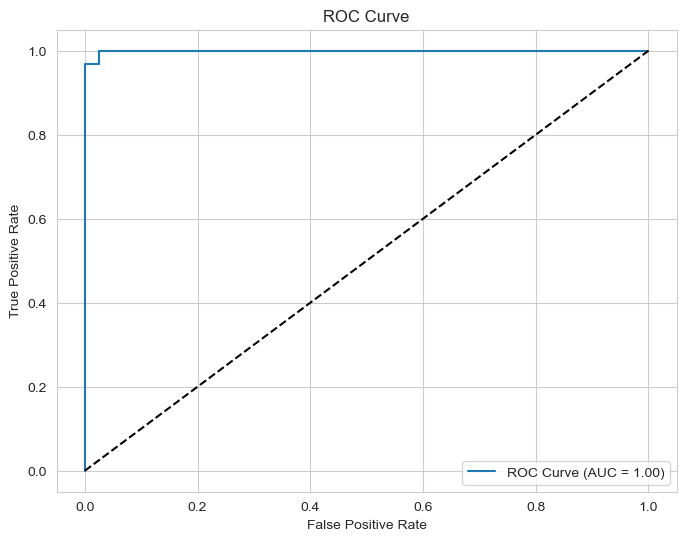

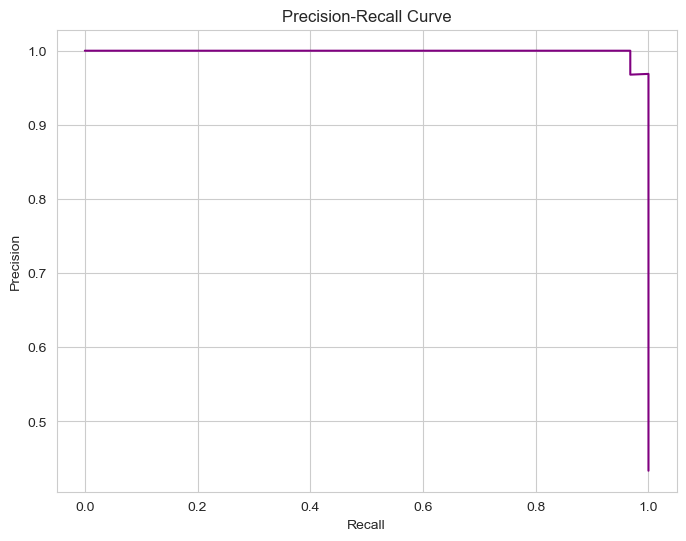

In [38]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

y_proba = xgb_model.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


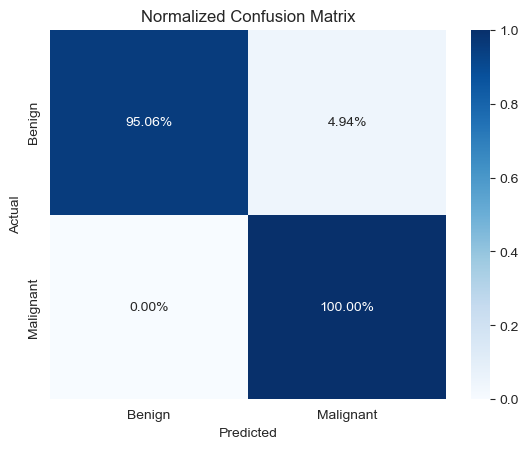

In [39]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
df.to_csv('cancer.csv', index=False)